> __Purpose:__ Implement a linkage attack, an initial and final one, on the newly saved data from the latest sims. Significant alterations were required to extract the data from the latest sims save files.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import seaborn as sns

from utils import *
from OLS_funcs import *

random.seed(a=1)

In [2]:
title_fontsize = 18
labels_fontsize = 18
ticks_fontsize = 18
global_fontsize = 18  # Shared default fontsize...

# Customizing fonts globally (optional, can be changed)
plt.rcParams.update({
    'font.family': 'sans-serif',  # Choose a serif font
    'font.serif': ['Arial'],  # Set to Times New Roman (if available)
    'font.size': labels_fontsize,  # Adjust default font size
    'axes.titlesize': title_fontsize,  # Title font size
    'axes.labelsize': labels_fontsize,  # Label font size
    'legend.fontsize': 12,  # Legend font size
})

## Load Data

In [ ]:
my_subjects_lst = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13']

augmented_subj_lst = list(my_subjects_lst) + [f'{subj}G' for subj in my_subjects_lst]

In [4]:
#[b1_c0_lri, b1_c2_lsi, b1_c3_st, b1_c4_pri, b1_c5_psi]
cond_labels = ["Local", "Per-FedAvg", "FedAvg", "Local", "Per-FedAvg", "FedAvg"]

# Define the desired order for the box plots
boxplot_order = [0, 1, 2, 3, 4, 5] #['Local Random', 'Local Sims', 'PFA Random', 'PFA Sims', 'None']

In [5]:
combined_cost_df = pd.read_csv('res_datasets\\OLS_cost_df.csv')
combined_privacy_df = pd.read_csv('res_datasets\\OLS_privacy_df.csv')

# Drop the Global model rows
combined_privacy_df = combined_privacy_df[~combined_privacy_df['Model'].str.contains("Global", na=False)]


In [8]:
full_intra_privacy_df = combined_privacy_df[combined_privacy_df["Scenario"]=="Intra-Subject"]

print(full_intra_privacy_df.shape)
full_intra_privacy_df.head()

(42, 7)


,Condition_Number,Subject_ID,Privacy,Algorithm,x_pos,Scenario,Model
0,0,S0,1,Local,0,Intra-Subject,Local
1,0,S1,1,Local,0,Intra-Subject,Local
2,0,S2,1,Local,0,Intra-Subject,Local
3,0,S3,1,Local,0,Intra-Subject,Local
4,0,S4,1,Local,0,Intra-Subject,Local


In [9]:
full_cross_privacy_df = combined_privacy_df[combined_privacy_df["Scenario"]=="Cross-Subject"]

print(full_cross_privacy_df.shape)
full_cross_privacy_df.head()

(42, 7)


,Condition_Number,Subject_ID,Privacy,Algorithm,x_pos,Scenario,Model
70,3,S0,1,Local,0,Cross-Subject,Local
71,3,S1,1,Local,0,Cross-Subject,Local
72,3,S2,1,Local,0,Cross-Subject,Local
73,3,S3,1,Local,0,Cross-Subject,Local
74,3,S4,1,Local,0,Cross-Subject,Local


In [10]:
vel_error_intra_df = combined_cost_df[combined_cost_df["Scenario"]=="Intra"]

print(vel_error_intra_df.shape)
vel_error_intra_df.head()

(42, 6)


,Condition_Number,x_pos,Algorithm,Scenario,Cost,Subject_ID
0,0,0,Local,Intra,0.033732,0
1,0,0,Local,Intra,0.178690,1
2,0,0,Local,Intra,0.005490,2
3,0,0,Local,Intra,0.004171,3
4,0,0,Local,Intra,0.003799,4


In [11]:
vel_error_cross_df = combined_cost_df[combined_cost_df["Scenario"]=="Cross"]

print(vel_error_cross_df.shape)
vel_error_cross_df.head()

(42, 6)


,Condition_Number,x_pos,Algorithm,Scenario,Cost,Subject_ID
42,3,0,Local,Cross,0.289187,0
43,3,0,Local,Cross,0.254175,1
44,3,0,Local,Cross,0.326849,2
45,3,0,Local,Cross,0.332813,3
46,3,0,Local,Cross,0.304886,4


In [12]:
dot_size = 1.75
marker_size = 10
err_bar_width = 3
capsize = 0.0


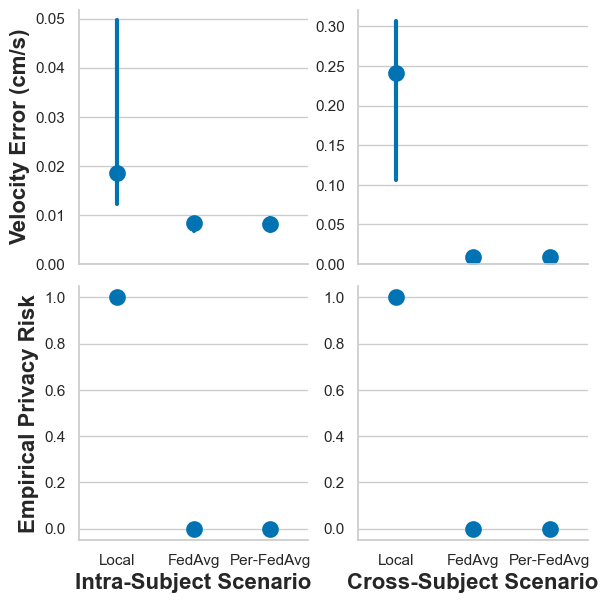

In [ ]:

tick_fontsize  = 11
label_fontsize = 16
palette_name   = "colorblind"

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex='col')

# ── Top‐Left (a): Intra Velocity Error ────────────────────────────────────────
ax = axs[0,0]
sns.pointplot(
    x='x_pos', y='Cost', hue='Scenario',
    data=vel_error_intra_df,
    palette=palette_name,
    estimator=np.median,
    errorbar=('pi', 50),      # use IQR here too
    capsize=capsize,
    linestyle='none',
    err_kws={'linewidth':err_bar_width},
    ax=ax
)
# Set marker size directly via matplotlib
for line in ax.lines:
    line.set_markersize(marker_size) 
ax.set_ylim(bottom=0.0)
ax.set_ylabel("Velocity Error (cm/s)", fontweight='bold', fontsize=label_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
#ax.set_xticks([])       # no x‐ticks here
#ax.set_xlabel("")
ax.get_legend().remove()
for sp in ['top','right']:
    ax.spines[sp].set_visible(False)

# ── Top‐Right (c): Cross Velocity Error ───────────────────────────────────────
ax = axs[0,1]
sns.pointplot(
    x='x_pos', y='Cost', hue='Scenario',
    data=vel_error_cross_df,
    palette=palette_name,
    estimator=np.median,
    errorbar=('pi', 50),      # use IQR here too
    capsize=capsize,
    linestyle='none',
    err_kws={'linewidth':err_bar_width},
    ax=ax
)
# Set marker size directly via matplotlib
for line in ax.lines:
    line.set_markersize(marker_size) 
ax.set_ylabel("")      # no y‐label
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.set_ylim(bottom=0.0)
ax.get_legend().remove()
for sp in ['top','right']:
    ax.spines[sp].set_visible(False)

# ── Bottom‐Left (b): Intra Privacy Risk ───────────────────────────────────────
ax = axs[1,0]
sns.pointplot(
    x='x_pos', y='Privacy', hue='Model',
    data=full_intra_privacy_df,
    palette=palette_name,
    estimator=np.median,
    errorbar=('pi', 50),      # use IQR here too
    capsize=capsize,
    linestyle='none',
    err_kws={'linewidth':err_bar_width},
    ax=ax
)
# Set marker size directly via matplotlib
for line in ax.lines:
    line.set_markersize(marker_size) 
ax.set_ylabel("Empirical Privacy Risk", fontweight='bold', fontsize=label_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
# now put x‐ticks back for bottom row
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Local','FedAvg','Per-FedAvg'], fontsize=tick_fontsize)
ax.set_xlabel("Intra-Subject Scenario", fontsize=label_fontsize, fontweight='bold')
ax.get_legend().remove()
for sp in ['top','right']:
    ax.spines[sp].set_visible(False)

# ── Bottom‐Right (d): Cross Privacy Risk ──────────────────────────────────────
ax = axs[1,1]
sns.pointplot(
    x='x_pos', y='Privacy', hue='Model',
    data=full_cross_privacy_df,
    palette=palette_name,
    estimator=np.median,
    errorbar=('pi', 50),      # use IQR here too
    capsize=capsize,
    linestyle='none',
    err_kws={'linewidth':err_bar_width},
    ax=ax
)
# Set marker size directly via matplotlib
for line in ax.lines:
    line.set_markersize(marker_size) 
ax.set_ylabel("")      # no y‐label
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Local','FedAvg','Per-FedAvg'], fontsize=tick_fontsize)
ax.set_xlabel("Cross-Subject Scenario", fontsize=label_fontsize, fontweight='bold')
ax.get_legend().remove()
for sp in ['top','right']:
    ax.spines[sp].set_visible(False)

plt.tight_layout(pad=0.5, h_pad=0.8, w_pad=0.6)
#plt.savefig('OLSims_PrimaryOutcome_Dots.png', dpi=500, bbox_inches='tight')
plt.show()
